In [2]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
#Load Dataset
data=pd.read_csv('./cannabisGrowthRaw2020.csv')

In [4]:
#list of missing values in the data
mising = ["?", "none"]
data=pd.read_csv("./cannabisGrowthRaw2020.csv", na_values = mising)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
PMCno       1458 non-null float64
DBH         1470 non-null float64
Ht          1470 non-null float64
Surv        1284 non-null float64
Vig         1334 non-null float64
Ins_res     1334 non-null float64
Stem_Fm     1334 non-null float64
Crown_Fm    1334 non-null float64
Brnch_Fm    1334 non-null float64
Utility     1112 non-null object
dtypes: float64(9), object(1)
memory usage: 115.1+ KB


In [6]:
data.head()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,good
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,low
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,good
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,good


In [7]:
#Summary of N/A Values
data.isnull().sum()

PMCno        14
DBH           2
Ht            2
Surv        188
Vig         138
Ins_res     138
Stem_Fm     138
Crown_Fm    138
Brnch_Fm    138
Utility     360
dtype: int64

In [8]:
#data cleaning using case deletion
data1 = data.dropna()

In [9]:
#removing PMCNO coloumn from the data.
data2=data1.drop('PMCno',axis=1)

In [15]:
#Visualization of All Variables
#pairplot = sns.pairplot(data2, hue="Utility")
#pairplot

In [16]:
data2.corr()

,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
DBH,1.000000,0.078525,-0.038375,0.029540,0.052259,-0.005266,0.016038,-0.016465
Ht,0.078525,1.000000,-0.247667,0.484807,0.291635,0.227196,0.090726,-0.146722
Surv,-0.038375,-0.247667,1.000000,0.105041,-0.218819,0.017697,-0.011449,0.085987
Vig,0.029540,0.484807,0.105041,1.000000,0.413326,0.247700,-0.002384,-0.167087
Ins_res,0.052259,0.291635,-0.218819,0.413326,1.000000,0.175588,0.125706,-0.031176
Stem_Fm,-0.005266,0.227196,0.017697,0.247700,0.175588,1.000000,0.664462,0.594891
Crown_Fm,0.016038,0.090726,-0.011449,-0.002384,0.125706,0.664462,1.000000,0.718249
Brnch_Fm,-0.016465,-0.146722,0.085987,-0.167087,-0.031176,0.594891,0.718249,1.000000


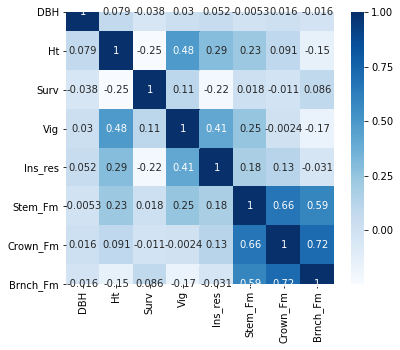

In [17]:
#Visualization of Correlations
import seaborn as sns
f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(data2.corr(),annot=True, ax = ax,cmap="Blues")

In [18]:
#Identify Correlated Columns
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(data2.drop('Utility',axis=1),0.6)
print('Correlated columns:',col) 

Correlated columns: {'Brnch_Fm', 'Crown_Fm'}


In [19]:
#Create x and y variables
x = data2.drop('Utility', axis=1).values
y = data2['Utility'].values

In [20]:
#Prepare for Models for Comparison

#Load Library for Training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state = 100)

In [21]:
#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)


ModuleNotFoundError: No module named 'imblearn'